# Exercise -2 

Use image transformation methods to count the number of bricks:

* Create a new pyhton notebook
* load the image that contains brick
* apply series of transformational steps
* count the number of bricks
* Display the output image

In [63]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from pylab import rcParams
rcParams['axes.xmargin'] = 0
rcParams['axes.ymargin'] = 0
rcParams['figure.figsize'] = (14,6)

## Find Image difference

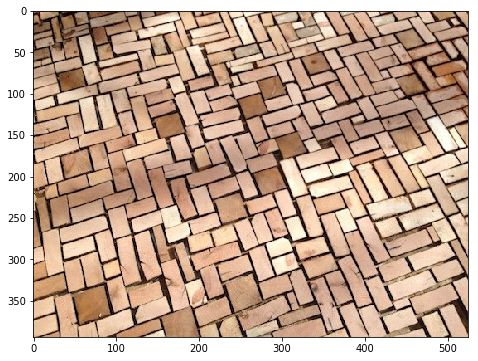

In [54]:
img = cv2.imread('images/bricks.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

# Series of transformation operations on Images
We used bilateralFilter for blurring the image rather than vanilla blurring or Gaussian blurring since we are interested in counting number of bricks so we need to preserve the edges and therefore bilateralFilter is a good choice as it blurs the image while preserving the edges.

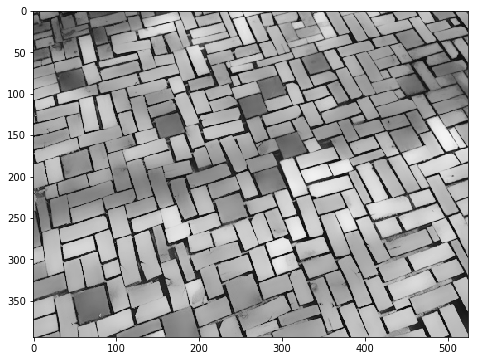

In [55]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_preprocessed = cv2.bilateralFilter(img_gray,21,41,41)
plt.imshow(img_preprocessed,cmap=cm.gray, vmin=0, vmax=255)

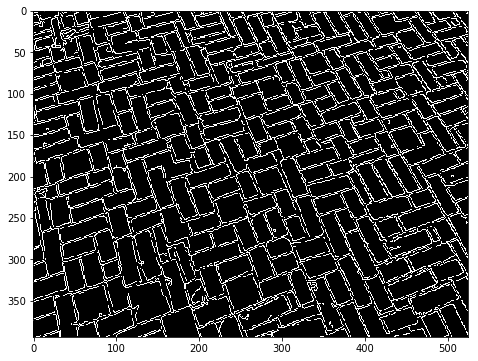

In [56]:
img_edged = cv2.Canny(img_preprocessed,50,200)
plt.imshow(img_edged,cmap=cm.gray, vmin=0, vmax=255)

(<matplotlib.axes._subplots.AxesSubplot at 0x12f67dc18>,
 (-0.5, 524.5, 393.5, -0.5))

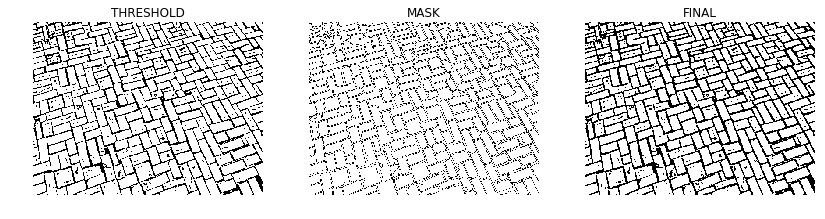

In [57]:
thresh = cv2.adaptiveThreshold(img_preprocessed,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
mask = cv2.bitwise_not(img_edged)
final_img = cv2.bitwise_and(thresh,mask)
plt.subplot(131),plt.imshow(thresh, cmap=cm.gray, vmin=0, vmax=255),plt.title('THRESHOLD'),plt.axis("Off")
plt.subplot(132),plt.imshow(mask, cmap=cm.gray, vmin=0, vmax=255),plt.title('MASK'),plt.axis("off")
plt.subplot(133),plt.imshow(new_thresh, cmap=cm.gray, vmin=0, vmax=255),plt.title('FINAL'),plt.axis("off")

NUMBER OF bricks: 255


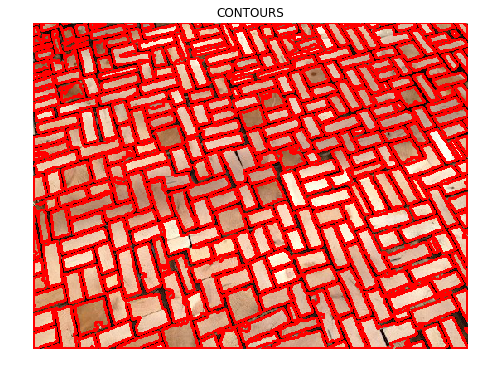

In [62]:
# find contours
_, brick_contours, _ = cv2.findContours(final_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# make copy of image
bricks_and_contours = np.copy(img)

# find contours of large enough area
min_brick_area = 5
large_contours = [cnt for cnt in brick_contours if cv2.contourArea(cnt) > min_brick_area]

# draw contours
cv2.drawContours(bricks_and_contours, large_contours, -1, (255,0,0),2)

plt.title('CONTOURS'),plt.axis("off")
plt.imshow(bricks_and_contours)

# print number of contours
print('NUMBER OF bricks: %d' % len(large_contours))

In [59]:
print('The end!')

The end!
